Project 3

Ketevani Bibichadze

04/12/2025

I completed this work independently.

In [ ]:
"""
Project 3: Data Visualization & EDA - Data Generator
Kutaisi International University
Introduction to Data Science with Python

This script generates realistic student academic performance data
for practicing data visualization and exploratory data analysis.

Instructions:
1. Run this script to generate the CSV file
2. Use this file for all tasks in Project 3
3. Do not modify this script or the generated CSV file before starting your work

Generated file:
- student_performance.csv (500 students with comprehensive academic data)
"""

import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("=" * 70)
print("Project 3: Data Visualization & EDA - Data Generator")
print("Introduction to Data Science with Python")
print("=" * 70)
print()

# ============================================================================
# PART 1: Generate Student Academic Performance Data
# ============================================================================

print("[1/5] Generating student demographic data...")

n_students = 500

# Demographics
student_ids = [f"STU{str(i + 1).zfill(4)}" for i in range(n_students)]
genders = np.random.choice(["Male", "Female"], n_students, p=[0.52, 0.48])
ages = np.random.randint(18, 25, n_students)

# Academic information
majors = [
    "Computer Science",
    "Engineering",
    "Business",
    "Mathematics",
    "Physics",
    "Biology",
    "Economics",
    "Psychology",
]
major_list = np.random.choice(majors, n_students)

years = np.random.choice(
    ["Freshman", "Sophomore", "Junior", "Senior"],
    n_students,
    p=[0.30, 0.28, 0.25, 0.17],
)

# Scholarships (some correlation with performance)
scholarship_base = np.random.choice([True, False], n_students, p=[0.35, 0.65])

print("[2/5] Generating academic performance data...")

# Study hours per week (will correlate with grades)
study_hours = np.random.gamma(3, 3, n_students)  # Gamma distribution
study_hours = np.clip(study_hours, 2, 40)  # Reasonable range

# Attendance rate (%)
attendance_base = np.random.beta(8, 2, n_students) * 100  # Beta distribution
attendance = np.clip(attendance_base, 40, 100)

# Previous semester GPA (on 4.0 scale)
prev_gpa_base = np.random.beta(5, 2, n_students) * 4.0
prev_gpa = np.clip(prev_gpa_base, 1.5, 4.0)

# Current semester course scores (5 courses)
# Scores influenced by study hours, attendance, and previous GPA
courses = ["Mathematics", "Programming", "Statistics", "English", "Science"]


def generate_score(study_h, attend, prev_gpa):
    """Generate course score based on factors with some randomness"""
    base_score = (
        0.3 * (study_h / 40 * 100)  # Study hours contribution
        + 0.3 * attend  # Attendance contribution
        + 0.3 * (prev_gpa / 4.0 * 100)  # Previous GPA contribution
        + 0.1 * np.random.uniform(60, 100)  # Random factor
    )
    # Add some noise
    score = base_score + np.random.normal(0, 8)
    return np.clip(score, 0, 100)


scores_dict = {}
for course in courses:
    course_scores = [
        generate_score(study_hours[i], attendance[i], prev_gpa[i])
        for i in range(n_students)
    ]
    scores_dict[f"{course}_Score"] = np.round(course_scores, 1)

print("[3/5] Generating behavioral and lifestyle data...")

# Extracurricular activities (hours per week)
extracurricular = np.random.exponential(3, n_students)
extracurricular = np.clip(extracurricular, 0, 20)

# Part-time work hours
work_hours = np.random.choice(
    [0, 5, 10, 15, 20], n_students, p=[0.40, 0.15, 0.20, 0.15, 0.10]
)

# Sleep hours (per night)
sleep_base = np.random.normal(7, 1.5, n_students)
sleep_hours = np.clip(sleep_base, 4, 10)

# Distance from campus (km)
distance = np.random.exponential(8, n_students)
distance = np.clip(distance, 0.5, 50)

# Internet quality at home (1-5 scale)
internet_quality = np.random.choice(
    [1, 2, 3, 4, 5], n_students, p=[0.05, 0.10, 0.25, 0.35, 0.25]
)

print("[4/5] Generating additional academic metrics...")

# Midterm vs Final performance
midterm_avg = np.mean([scores_dict[f"{c}_Score"] for c in courses], axis=0)
# Final tends to be slightly different from midterm
final_diff = np.random.normal(2, 8, n_students)
final_avg = np.clip(midterm_avg + final_diff, 0, 100)

# Assignment submission rate (%)
assignment_rate_base = attendance + np.random.normal(0, 15, n_students)
assignment_rate = np.clip(assignment_rate_base, 20, 100)

# Number of late submissions
late_submissions = np.random.poisson(3, n_students)
late_submissions = np.clip(late_submissions, 0, 20)

# Library visits per semester
library_visits = np.random.negative_binomial(5, 0.3, n_students)
library_visits = np.clip(library_visits, 0, 50)

# Update scholarship based on performance
scholarship = scholarship_base.copy()
for i in range(n_students):
    if midterm_avg[i] >= 85 and prev_gpa[i] >= 3.5:
        scholarship[i] = True
    elif midterm_avg[i] < 60:
        scholarship[i] = False

print("[5/5] Calculating final grades and creating dataset...")

# Calculate current GPA (weighted average of courses)
current_scores = np.array([scores_dict[f"{c}_Score"] for c in courses]).T
current_gpa = (current_scores.mean(axis=1) / 100) * 4.0
current_gpa = np.clip(current_gpa, 0, 4.0)

# Pass/Fail status (passing is >= 60)
passed = current_gpa >= 2.4  # 60/100 = 2.4/4.0


# Academic status
def get_status(gpa, year):
    if gpa >= 3.5:
        return "Honor Roll"
    elif gpa >= 2.4:
        return "Good Standing"
    elif gpa >= 2.0:
        return "Probation"
    else:
        return "Academic Warning"


academic_status = [get_status(current_gpa[i], years[i]) for i in range(n_students)]

# ============================================================================
# PART 2: Create DataFrame
# ============================================================================

print()
print("Creating comprehensive dataset...")

data = {
    "Student_ID": student_ids,
    "Gender": genders,
    "Age": ages,
    "Major": major_list,
    "Year": years,
    "Previous_GPA": np.round(prev_gpa, 2),
    "Current_GPA": np.round(current_gpa, 2),
    "Study_Hours_Per_Week": np.round(study_hours, 1),
    "Attendance_Rate": np.round(attendance, 1),
    "Mathematics_Score": scores_dict["Mathematics_Score"],
    "Programming_Score": scores_dict["Programming_Score"],
    "Statistics_Score": scores_dict["Statistics_Score"],
    "English_Score": scores_dict["English_Score"],
    "Science_Score": scores_dict["Science_Score"],
    "Midterm_Average": np.round(midterm_avg, 1),
    "Final_Average": np.round(final_avg, 1),
    "Assignment_Submission_Rate": np.round(assignment_rate, 1),
    "Late_Submissions": late_submissions,
    "Library_Visits": library_visits,
    "Extracurricular_Hours": np.round(extracurricular, 1),
    "Part_Time_Work_Hours": work_hours,
    "Sleep_Hours": np.round(sleep_hours, 1),
    "Distance_From_Campus": np.round(distance, 1),
    "Internet_Quality": internet_quality,
    "Has_Scholarship": scholarship,
    "Passed": passed,
    "Academic_Status": academic_status,
}

df = pd.DataFrame(data)

# ============================================================================
# PART 3: Save to CSV
# ============================================================================

print()
print("=" * 70)
print("Saving CSV file...")
print("=" * 70)

df.to_csv("student_performance.csv", index=False)
print(f"✓ student_performance.csv saved ({len(df)} students)")

# ============================================================================
# PART 4: Print Dataset Summary
# ============================================================================

print()
print("=" * 70)
print("Dataset Summary")
print("=" * 70)
print()
print(f"Total Students: {len(df)}")
print(f"Columns: {len(df.columns)}")
print()

print("DEMOGRAPHIC DISTRIBUTION:")
print(
    f"  • Gender: {(df['Gender'] == 'Male').sum()} Male, {(df['Gender'] == 'Female').sum()} Female"
)
print(f"  • Age Range: {df['Age'].min()}-{df['Age'].max()} years")
print(f"  • Majors: {df['Major'].nunique()} different majors")
print(f"  • Year Distribution:")
for year in ["Freshman", "Sophomore", "Junior", "Senior"]:
    count = (df["Year"] == year).sum()
    print(f"      - {year}: {count}")
print()

print("ACADEMIC PERFORMANCE:")
print(f"  • Average Current GPA: {df['Current_GPA'].mean():.2f}")
print(f"  • GPA Range: {df['Current_GPA'].min():.2f} - {df['Current_GPA'].max():.2f}")
print(
    f"  • Students Passing: {df['Passed'].sum()} ({df['Passed'].sum() / len(df) * 100:.1f}%)"
)
print(f"  • Honor Roll Students: {(df['Academic_Status'] == 'Honor Roll').sum()}")
print(
    f"  • Students on Probation/Warning: {((df['Academic_Status'] == 'Probation') | (df['Academic_Status'] == 'Academic Warning')).sum()}"
)
print()

print("COURSE SCORES (Average):")
for course in courses:
    avg = df[f"{course}_Score"].mean()
    print(f"  • {course}: {avg:.1f}")
print()

print("STUDY HABITS:")
print(f"  • Average Study Hours/Week: {df['Study_Hours_Per_Week'].mean():.1f}")
print(f"  • Average Attendance Rate: {df['Attendance_Rate'].mean():.1f}%")
print(
    f"  • Average Assignment Submission: {df['Assignment_Submission_Rate'].mean():.1f}%"
)
print(f"  • Average Library Visits: {df['Library_Visits'].mean():.1f}")
print()

print("LIFESTYLE FACTORS:")
print(f"  • Average Sleep Hours: {df['Sleep_Hours'].mean():.1f} hours/night")
print(f"  • Students with Part-Time Work: {(df['Part_Time_Work_Hours'] > 0).sum()}")
print(
    f"  • Average Extracurricular Hours: {df['Extracurricular_Hours'].mean():.1f} hours/week"
)
print()

print("FINANCIAL:")
print(
    f"  • Students with Scholarships: {df['Has_Scholarship'].sum()} ({df['Has_Scholarship'].sum() / len(df) * 100:.1f}%)"
)
print()

print("CORRELATIONS TO INVESTIGATE:")
print("  • Study Hours vs GPA")
print("  • Attendance vs Course Scores")
print("  • Sleep vs Performance")
print("  • Part-Time Work vs Academic Success")
print("  • Distance from Campus vs Attendance")
print("  • Previous GPA vs Current Performance")
print()

print("=" * 70)
print("Data generation complete!")
print("You can now proceed with Project 3: Data Visualization & EDA")
print("=" * 70)
print()
print("VISUALIZATION OPPORTUNITIES:")
print("  • Distribution plots for all numerical variables")
print("  • Comparison plots across majors, years, gender")
print("  • Correlation heatmaps")
print("  • Scatter plots for relationships")
print("  • Box plots for group comparisons")
print("  • Time series (midterm vs final)")
print("  • Multi-dimensional analysis")
print("=" * 70)
print()
print("NOTE: Do NOT modify this CSV file before starting your project.")
print("      Load it as-is and create all visualizations in your code.")
print("=" * 70)


Project 3: Data Visualization & EDA - Data Generator
Introduction to Data Science with Python

[1/5] Generating student demographic data...
[2/5] Generating academic performance data...
[3/5] Generating behavioral and lifestyle data...
[4/5] Generating additional academic metrics...
[5/5] Calculating final grades and creating dataset...

Creating comprehensive dataset...

Saving CSV file...
✓ student_performance.csv saved (500 students)

Dataset Summary

Total Students: 500
Columns: 27

DEMOGRAPHIC DISTRIBUTION:
  • Gender: 254 Male, 246 Female
  • Age Range: 18-24 years
  • Majors: 8 different majors
  • Year Distribution:
      - Freshman: 142
      - Sophomore: 142
      - Junior: 127
      - Senior: 89

ACADEMIC PERFORMANCE:
  • Average Current GPA: 2.44
  • GPA Range: 1.40 - 3.48
  • Students Passing: 290 (58.0%)
  • Honor Roll Students: 0
  • Students on Probation/Warning: 210

COURSE SCORES (Average):
  • Mathematics: 61.0
  • Programming: 61.3
  • Statistics: 60.6
  • English: 

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better -looking plots
sns. set_style ("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print(" Libraries loaded!")

# Load student performance data
df = pd.read_csv('student_performance.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumns :\n{df.columns.tolist ()}")
print(f"\nFirst few rows :\n{df.head ()}")

 Libraries loaded!
Dataset shape: (500, 27)

Columns :
['Student_ID', 'Gender', 'Age', 'Major', 'Year', 'Previous_GPA', 'Current_GPA', 'Study_Hours_Per_Week', 'Attendance_Rate', 'Mathematics_Score', 'Programming_Score', 'Statistics_Score', 'English_Score', 'Science_Score', 'Midterm_Average', 'Final_Average', 'Assignment_Submission_Rate', 'Late_Submissions', 'Library_Visits', 'Extracurricular_Hours', 'Part_Time_Work_Hours', 'Sleep_Hours', 'Distance_From_Campus', 'Internet_Quality', 'Has_Scholarship', 'Passed', 'Academic_Status']

First few rows :
  Student_ID  Gender  Age        Major       Year  Previous_GPA  Current_GPA  \
0    STU0001    Male   23     Business     Junior          3.73         2.60   
1    STU0002  Female   24     Business     Junior          2.96         2.70   
2    STU0003  Female   18  Mathematics  Sophomore          2.11         1.97   
3    STU0004  Female   18  Mathematics  Sophomore          3.05         2.67   
4    STU0005    Male   18  Engineering  Sophomor

TASK 1


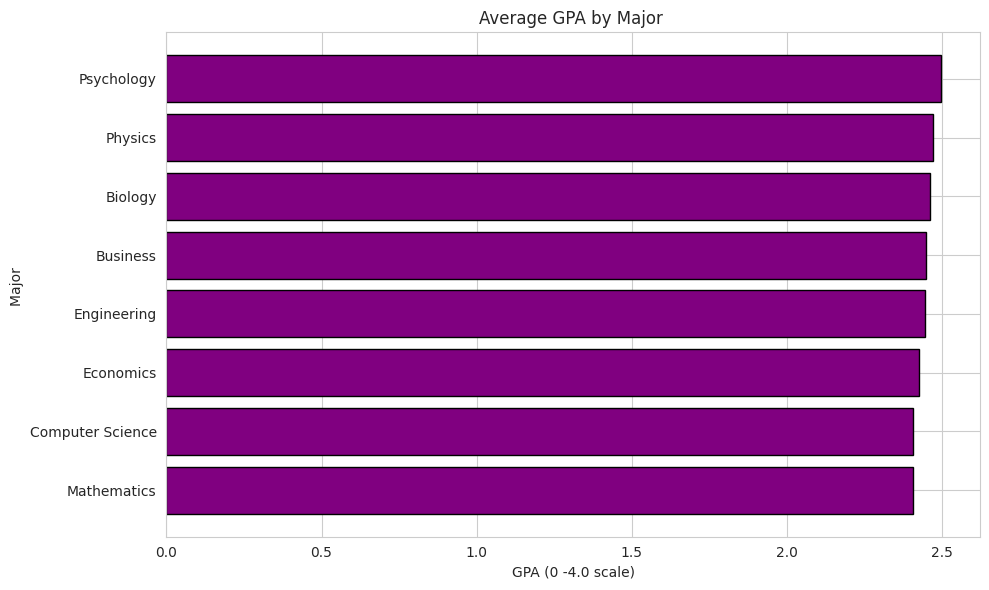

In [41]:
# Chart 1: Bar Chart - Average GPA by Major

# Calculate averages
avg_gpa = df.groupby('Major')['Current_GPA']. mean (). sort_values ()

# Create horizontal bar chart
plt.figure(figsize =(10 , 6))
plt.barh(avg_gpa.index , avg_gpa.values, color='purple',edgecolor='black')
plt.xlabel('GPA (0 -4.0 scale)')
plt.ylabel('Major ')
plt.title('Average GPA by Major ')
plt.tight_layout ()
plt.show ()

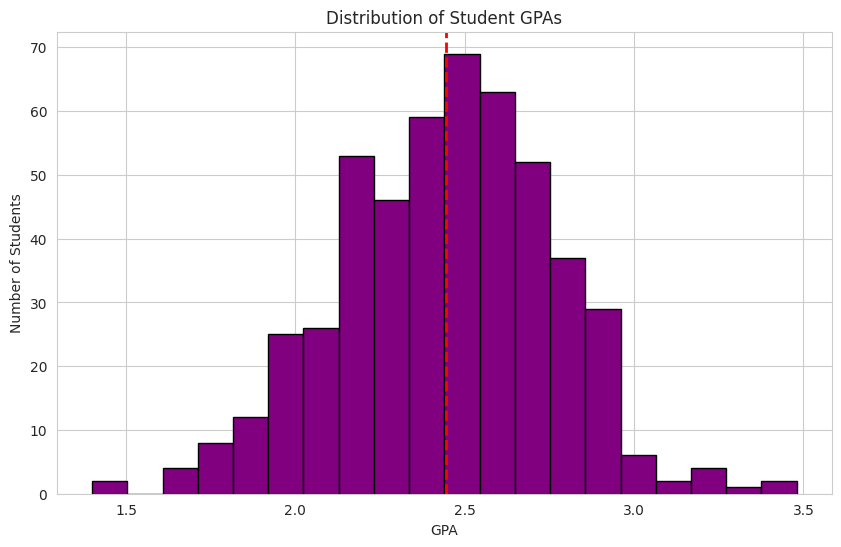

In [49]:
# Chart 2: Histogram - GPA Distribution
plt.figure(figsize=(10, 6))

plt.hist(df['Current_GPA'], bins=20, color= 'purple',edgecolor='black')
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.title('Distribution of Student GPAs')
plt.axvline(df['Current_GPA'].mean(), color='red', linestyle='--', linewidth=2)

plt.show()


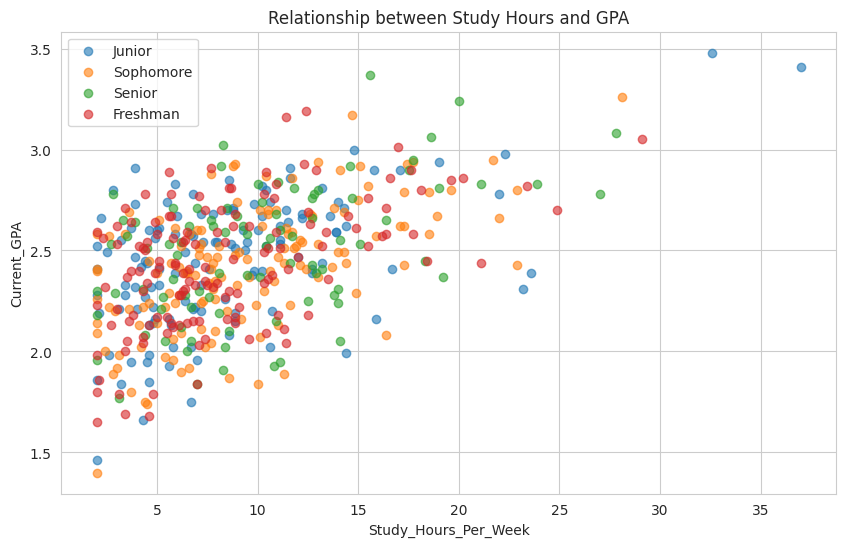

In [56]:
# Chart 3: Scatter Plot - Study Hours vs GPA
# Create scatter plot with different colors for each year
plt.figure(figsize=(10, 6))

for year in df['Year'].unique():
    data = df[df['Year'] == year]
    plt.scatter(data['Study_Hours_Per_Week'], data['Current_GPA'],
                label=year,
                alpha=0.6 )

plt.xlabel('Study_Hours_Per_Week')
plt.ylabel('Current_GPA')
plt.title('Relationship between Study Hours and GPA')
plt.legend()
plt.show()

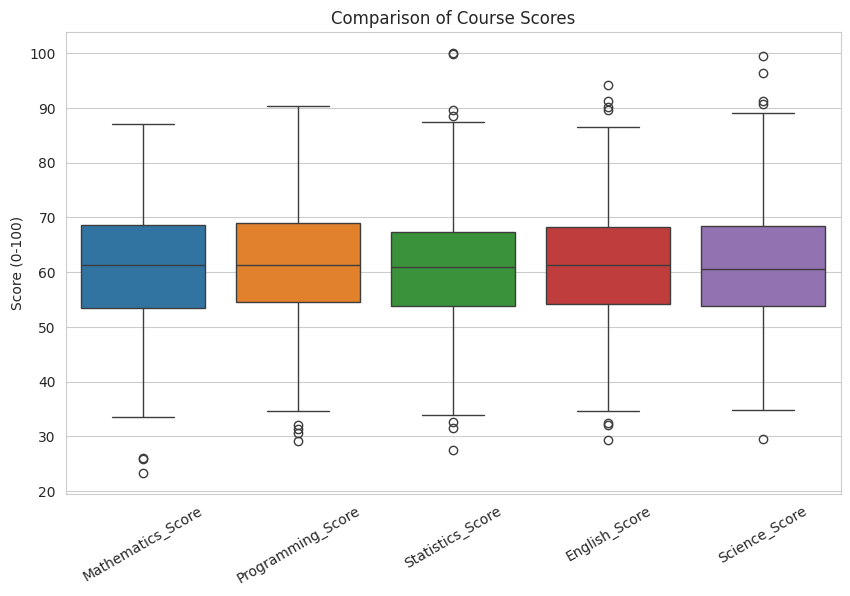

In [62]:
# Chart 4: Box Plot - Course Scores Comparison

courses = ['Mathematics_Score', 'Programming_Score', 'Statistics_Score', 'English_Score', 'Science_Score']


plt.figure(figsize=(10, 6))
sns.boxplot(data=df[courses])
plt.ylabel('Score (0-100)')
plt.title('Comparison of Course Scores')
plt.xticks(rotation=30)

plt.show()

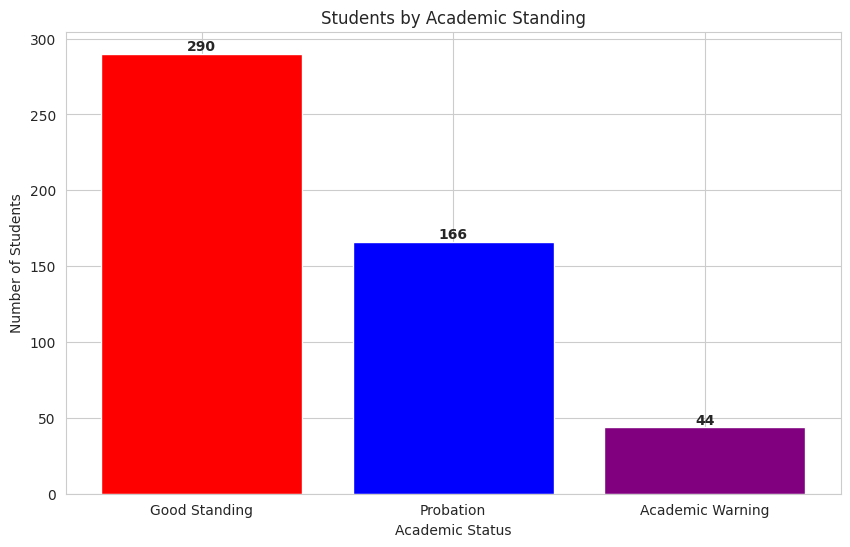

In [70]:
# Chart 5: Bar Chart - Students by Academic Status

# Count students by academic status
counts = df['Academic_Status'].value_counts()


plt.figure(figsize=(10, 6))

bars = plt.bar(counts.index, counts.values, color= ['red','blue','purple','orange'])
plt.xlabel('Academic Status')
plt.ylabel('Number of Students')
plt.title('Students by Academic Standing')
plt.bar_label(bars, fontweight='bold')

plt.show()

TASK 2


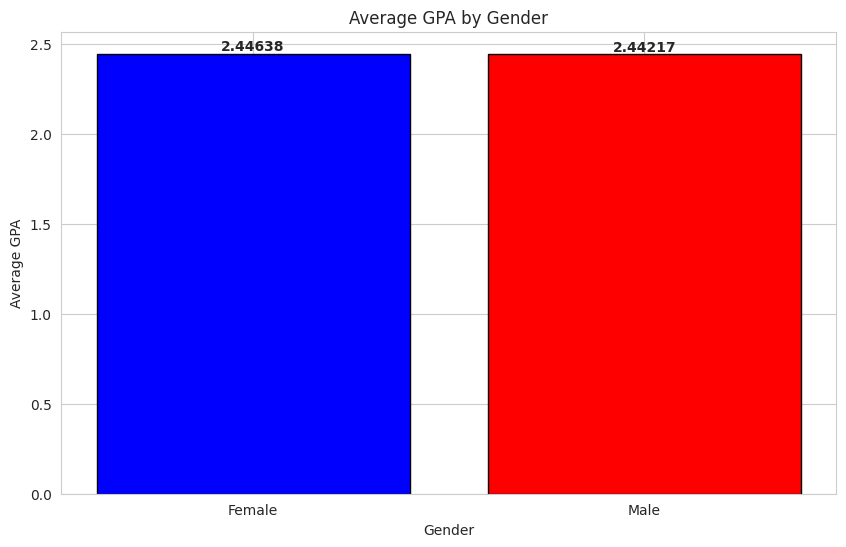

In [71]:
# Chart 1: Average GPA by Gender
# • Bar chart comparing Male vs Female average GPA
# • Use different colors for each gender
# • Show values on top of bars

plt.figure(figsize=(10, 6))

gender_gpa = df.groupby('Gender')['Current_GPA'].mean()
bars=plt.bar(gender_gpa.index, gender_gpa.values, color= ['blue', 'red'],edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Average GPA')
plt.title('Average GPA by Gender')
plt.bar_label(bars,fontweight='bold')


plt.show()

/tmp/ipython-input-2862964319.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Study_Hours_Per_Week', data=df, palette=['blue', 'red'])


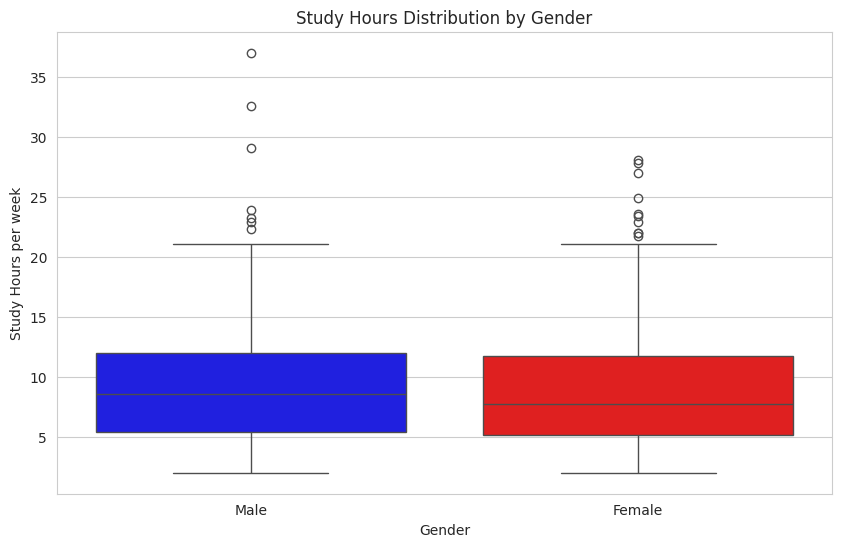

In [73]:
# Chart 2: Study Hours Distribution by Gender
# • Use sns.boxplot() or sns.violinplot()
# • X-axis: Gender
# • Y-axis: Study_Hours_Per_Week
# • Title should ask: ”Do study habits differ by gender?”

sns.boxplot(x='Gender', y='Study_Hours_Per_Week', data=df, palette=['blue', 'red'])

plt.xlabel('Gender')
plt.ylabel('Study Hours per week')
plt.title('Study Hours Distribution by Gender')
plt.show()

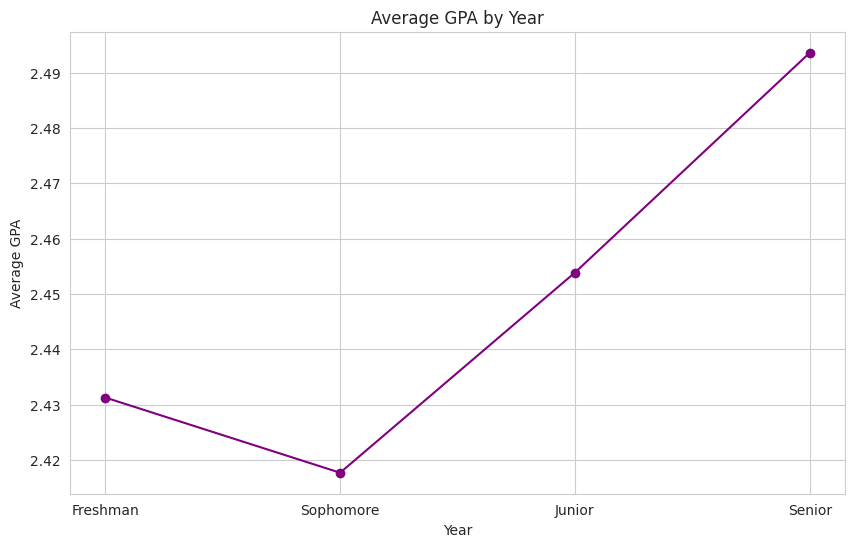

In [ ]:
# Chart 3: Average GPA by Year
# • Line chart or bar chart
# • Years: Freshman, Sophomore, Junior, Senior
# • Show trend: do students improve over time?

# Calculate average GPA by year
year_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']
year_gpa_average = df.groupby('Year')['Current_GPA'].mean()[year_order]

# line chart
plt.plot(year_gpa_average.index, year_gpa_average.values, marker='o',color='purple')
plt.xlabel('Year')
plt.ylabel('Average GPA')
plt.title('Average GPA by Year')
plt.show()

#Student GPAs decline from freshman to sophomore year,
#however improve after sophomore year


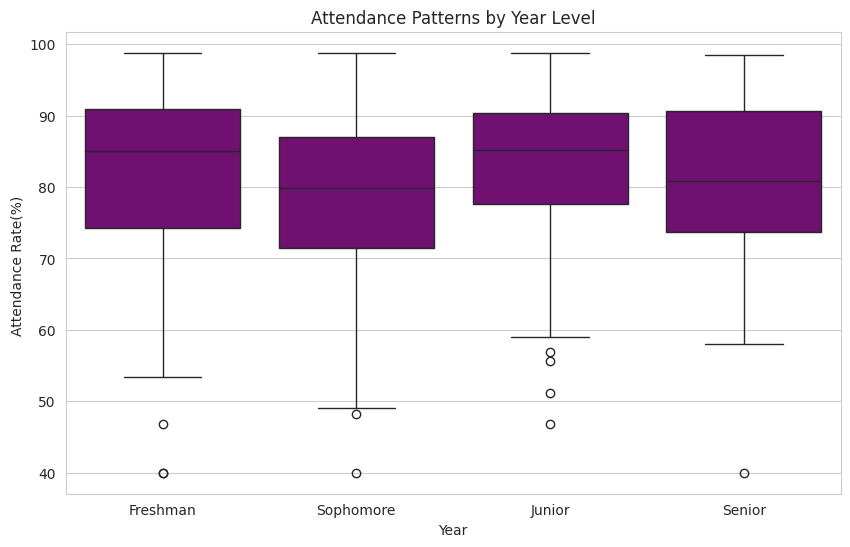

In [ ]:
# Chart 4: Attendance Rate by Year
# • Box plot comparing attendance across years
# • Title: ”Attendance Patterns by Year Level”
# • Identify which year has best/worst attendance

year_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']

sns.boxplot(x='Year', y='Attendance_Rate', data=df, order=year_order, color='purple')
plt.xlabel('Year')
plt.ylabel('Attendance Rate(%) ')
plt.title('Attendance Patterns by Year Level')

plt.show()

#Sophomore year has the worst attendance
#Junior year has the highest attendance rate


Average GPA of Students with Scholarship and no Scholarship:  
Has_Scholarship
False    2.389347
True     2.658431
Name: Current_GPA, dtype: float64

GPA Difference: 0.269084638880678


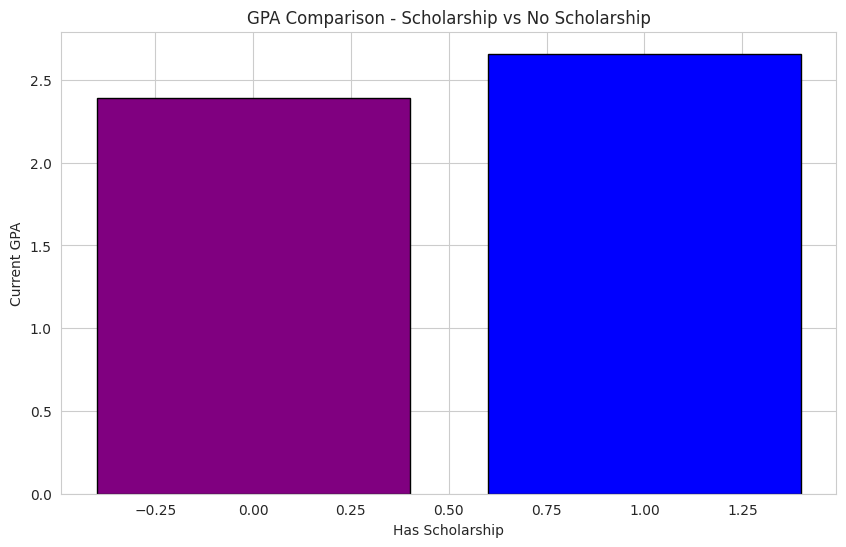

'\nScholarship students perform better, having higher GPA \nthan non-scholarship students by approximately 0.27\nReasons could be that (1) scholarships are awarded to students who\nalready have high GPA, (2) students with scholarships feel \nmore motivated to maintain their high GPA and their GPA is more consistent\n'

In [ ]:
# Chart 5: GPA Comparison - Scholarship vs No Scholarship
# • Two-group comparison (Has_Scholarship: True vs False)
# • Use box plot or bar chart
# • Calculate and show the average GPA difference

# Calculate average GPA by scholarship status
scholarship_gpa = df.groupby('Has_Scholarship')['Current_GPA'].mean()
print("Average GPA of Students with Scholarship and no Scholarship:  ")
print(scholarship_gpa)

print(f"\nGPA Difference: {scholarship_gpa[True] - scholarship_gpa[False]}")

# Bar chart

plt.bar(scholarship_gpa.index, scholarship_gpa.values, color=['purple', 'blue'],edgecolor='black')
plt.xlabel('Has Scholarship')
plt.ylabel('Current GPA')
plt.title('GPA Comparison - Scholarship vs No Scholarship')

plt.show()

# Write 2-3 sentences interpreting the result:
# • Do scholarship students perform better?
# • By how much on average?
# • What might explain this pattern?

"""
Scholarship students perform better, having higher GPA
than non-scholarship students by approximately 0.27
Reasons could be that (1) scholarships are awarded to students who
already have high GPA, (2) students with scholarships feel
more motivated to maintain their high GPA and their GPA is more consistent
"""

TASK 3: VISUAL REPORT

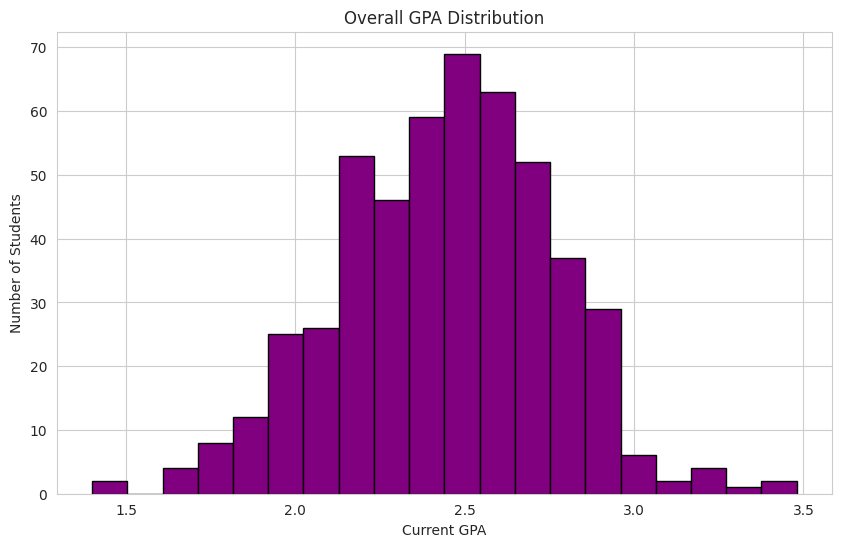

In [ ]:
# 1. Overall GPA distribution chart


plt.hist(df['Current_GPA'], bins=20, color= 'purple',edgecolor='black')
plt.xlabel('Current GPA')
plt.ylabel('Number of Students')
plt.title('Overall GPA Distribution')

plt.show()

# The chart shows how GPA is distributed among students. According to the chart,
# most students' GPAs are around 2.5

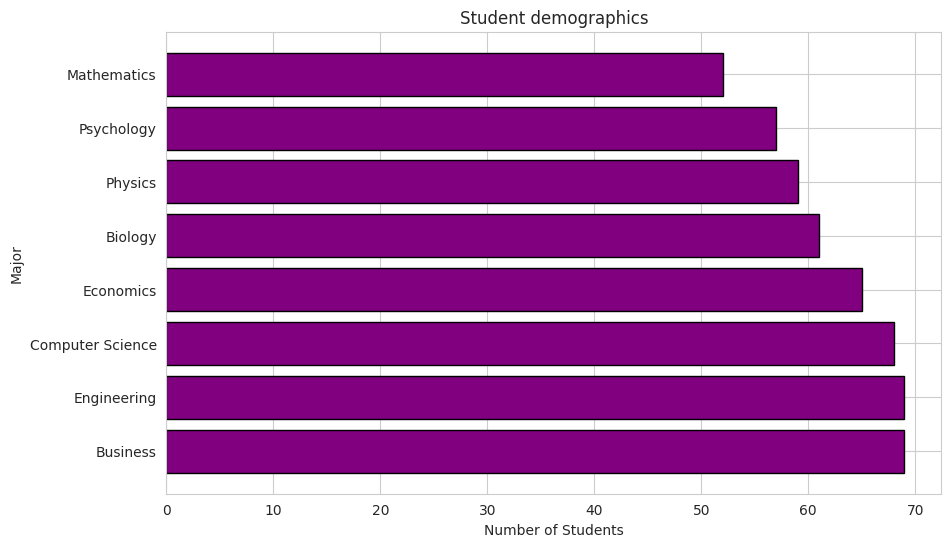

In [75]:
# 2.Student demographics (bar chart showing major distribution)

major_counts = df['Major'].value_counts()
plt.barh(major_counts.index, major_counts.values, color='purple', edgecolor='black')
plt.xlabel('Number of Students')
plt.ylabel('Major')
plt.title('Student demographics')

plt.show()

# shows how many students the university has on each major
# most popular majors are business and engineering, psychology
# and mathematics are the least popular



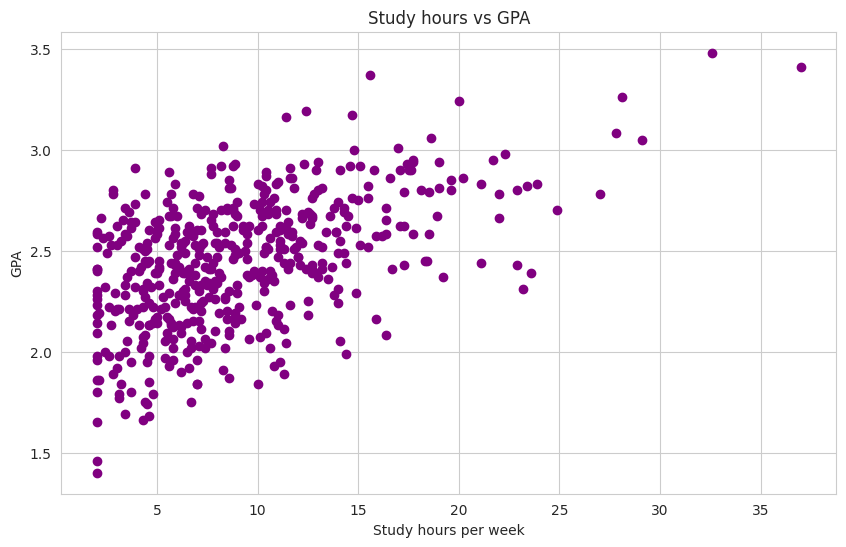

In [76]:
#3. Study hours vs GPA (scatter plot)
plt.scatter(df['Study_Hours_Per_Week'], df['Current_GPA'],color='purple')
plt.xlabel('Study hours per week')
plt.ylabel('GPA')
plt.title('Study hours vs GPA')
plt.show()

# shows how study hours is related to GPA.

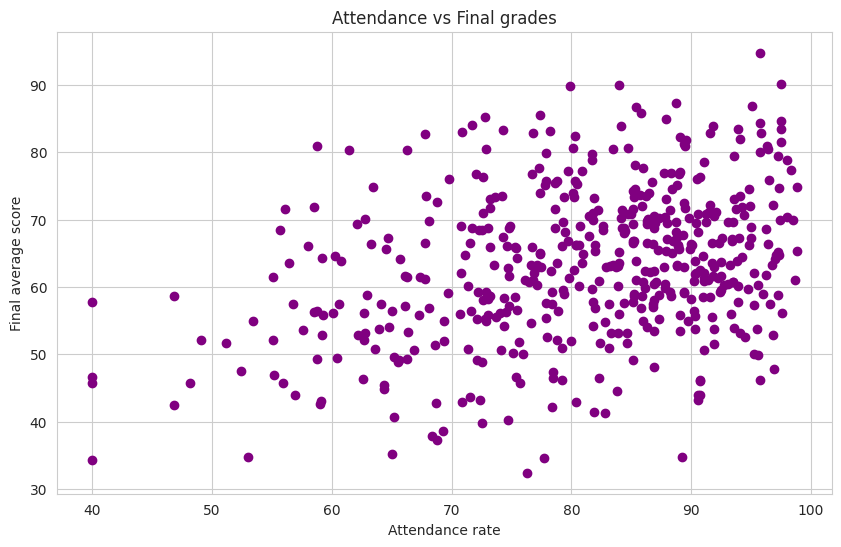

In [ ]:
# 4. Attendance vs Final grades (scatter plot)
plt.scatter(df['Attendance_Rate'], df['Final_Average'], color='purple')
plt.xlabel('Attendance rate')
plt.ylabel('Final average score')
plt.title('Attendance vs Final grades')
plt.show()

# shows how attendance hours affect final grades.


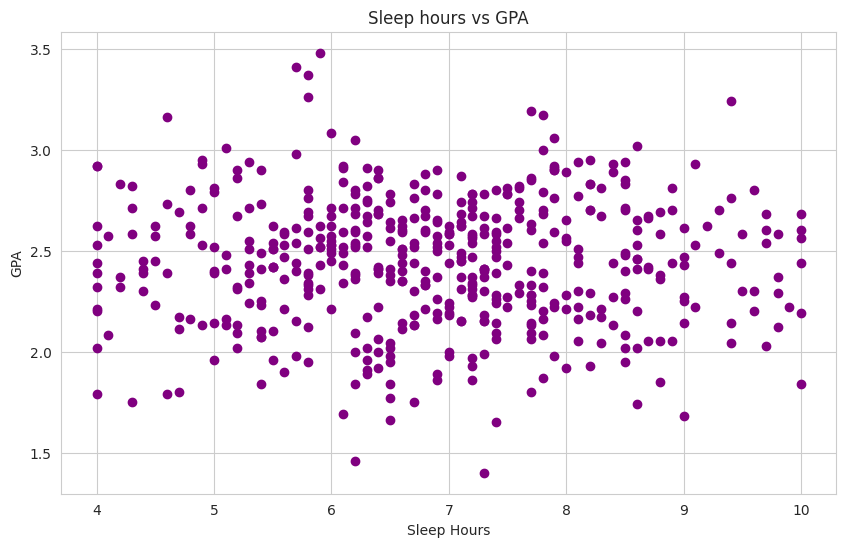

In [77]:
# 5. Sleep hours vs GPA (scatter plot or box plot grouped by sleep ranges)

plt.scatter(df['Sleep_Hours'], df['Current_GPA'], color='purple')
plt.xlabel('Sleep Hours')
plt.ylabel('GPA')
plt.title('Sleep hours vs GPA')
plt.show()

# shows correlation between sleep hours and GPA


Has_Work
False    2.423575
True     2.457231
Name: Current_GPA, dtype: float64


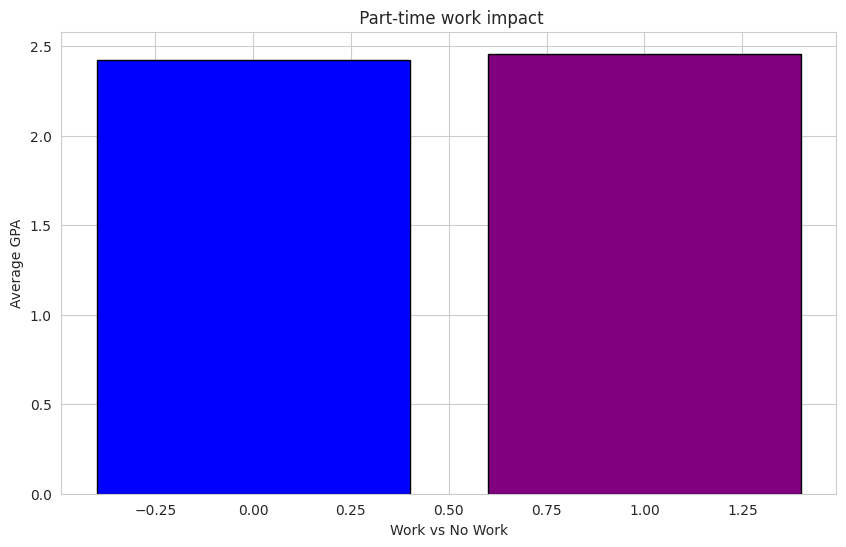

In [78]:
# 6. Part-time work impact (compare GPA: work vs no work)

df['Has_Work'] = df['Part_Time_Work_Hours'] > 0
work_gpa = df.groupby('Has_Work')['Current_GPA'].mean()
print(work_gpa)
plt.bar(work_gpa.index, work_gpa.values, color=['blue', 'purple'],edgecolor='black')
plt.xlabel('Work vs No Work')
plt.ylabel('Average GPA')
plt.title(' Part-time work impact')
plt.show()

# Employed vs Unemployed students' average GPA.
# First one is 2.42 and second one is 2.45, so there's minimal difference


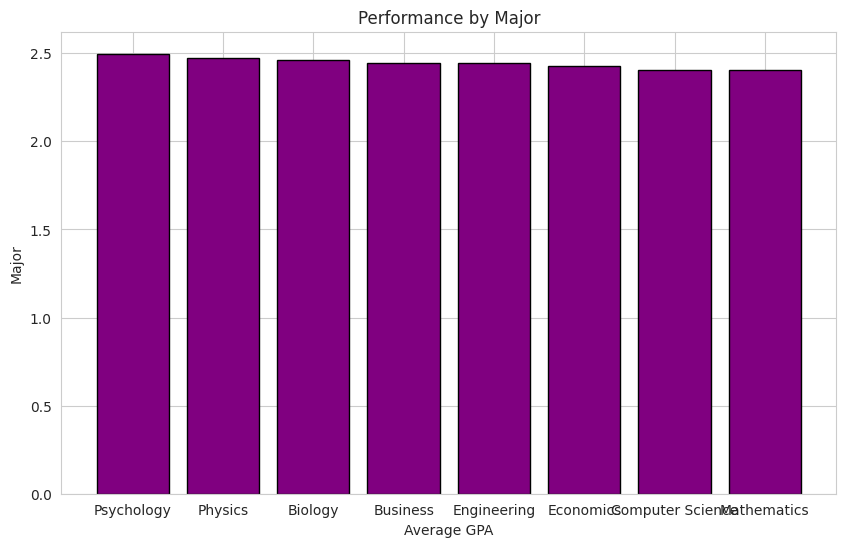

In [79]:
# 7. Performance by major (bar chart)

major_gpa = df.groupby('Major')['Current_GPA'].mean().sort_values(ascending=False)
plt.bar(major_gpa.index, major_gpa.values, color='purple', edgecolor='black')
plt.xlabel('Average GPA')
plt.ylabel('Major')
plt.title('Performance by Major')


plt.show()

# shows average GPA on each major
# psychology and physics students have the highest average GPA,
# CS and Math majors have the lowest GPA

Executive Summmary

In [ ]:
average_gpa = df['Current_GPA'].mean()
passing_count = df['Passed'].sum()
passing_rate = (passing_count / 500) * 100


print(f"Total students: {len(df)}")
print(f"Average GPA: {average_gpa}")
print(f"Students passing: {passing_count}")
print(f"Passing rate: {passing_rate}")

Total students: 500
Average GPA: 2.4442399999999997
Students passing: 290
Passing rate: 57.99999999999999


*Key findings in the dataset are: The dataset contains 500 students data, and the average GPA of these 500 students is 2.44. Out of 500, students passing are 290, which is 57.9 percentage rate.*

Main insights

In [ ]:
# What factors most strongly relate to GPA?



'''
According tio the charts, factors most related to GPA are attendance rate and
study hours per week. To be more specific, let's calculate correlations
between GPA and some factors in the dataset.
'''
# calculate correlations
study_corr = df['Study_Hours_Per_Week'].corr(df['Current_GPA'])
attendance_corr = df['Attendance_Rate'].corr(df['Current_GPA'])
sleep_corr = df['Sleep_Hours'].corr(df['Current_GPA'])
work_corr = df['Part_Time_Work_Hours'].corr(df['Current_GPA'])

print("Correlation with GPA:")
print(f"Study Hours: {study_corr}")
print(f"Attendance Rate: {attendance_corr}")
print(f"Sleep Hours: {sleep_corr}")
print(f"Part-Time Work Hours: {work_corr}")


# Study hours show the highest correlation to GPA, which is 0.52, and
# attendance rate is also a contributor, correlation being 0.48


Correlation with GPA:
Study Hours: 0.524244377927729
Attendance Rate: 0.4889617881710648
Sleep Hours: -0.012189884155159323
Part-Time Work Hours: 0.07704479678359294


In [ ]:
# Which student groups need more support?

'''
Again, current GPA is most closely correlated to study hours and attendance rates,
so groups that need more support are those with low study hours and low attendance rates, so
that they can improve their performance .
Also, Graph 3 (line chart of average GPA by each year) suggests thatfreshmen and sophomores have the
lowest GPA, and student GPA drops from freshman to sophomore year, however improve after sophomore year.
This indicates that these two groups need the most support out of the four.
'''


year_gpa = df.groupby('Year')['Current_GPA'].mean()

print("Average GPA by Year:")
print(year_gpa)

# freshman average GPA is 2.43 and sophomore average GPA (lowest out of the 4) is 2.41



Average GPA by Year:
Year
Freshman     2.431268
Junior       2.453858
Senior       2.493596
Sophomore    2.417676
Name: Current_GPA, dtype: float64


Recommendations

For students, the recommendation drawn from the analysis would be to try to increase their study hours and attend more of their classes, because these are the factors correlated to higher GPA.
For university, they should work on student motivators or incentives to improve their attendance rate, offer extra support in studying, such as workshops, extra more student-focused classes.